>epoch=0, lrate=0.500, error=94.018
>epoch=1, lrate=0.500, error=83.337
>epoch=2, lrate=0.500, error=83.336
>epoch=3, lrate=0.500, error=83.334
>epoch=4, lrate=0.500, error=83.331
>epoch=5, lrate=0.500, error=83.327
>epoch=6, lrate=0.500, error=83.321
>epoch=7, lrate=0.500, error=83.311
>epoch=8, lrate=0.500, error=83.289
>epoch=9, lrate=0.500, error=83.211
>epoch=10, lrate=0.500, error=81.367
>epoch=11, lrate=0.500, error=65.563
>epoch=12, lrate=0.500, error=51.947
>epoch=13, lrate=0.500, error=47.144
>epoch=14, lrate=0.500, error=45.057
>epoch=15, lrate=0.500, error=44.249
>epoch=16, lrate=0.500, error=43.578
>epoch=17, lrate=0.500, error=43.293
>epoch=18, lrate=0.500, error=43.110
>epoch=19, lrate=0.500, error=42.889
>epoch=20, lrate=0.500, error=42.761
>epoch=21, lrate=0.500, error=42.508
>epoch=22, lrate=0.500, error=42.565
>epoch=23, lrate=0.500, error=42.453
>epoch=24, lrate=0.500, error=42.474
>epoch=25, lrate=0.500, error=42.315
>epoch=26, lrate=0.500, error=42.305
>epoch=27, 

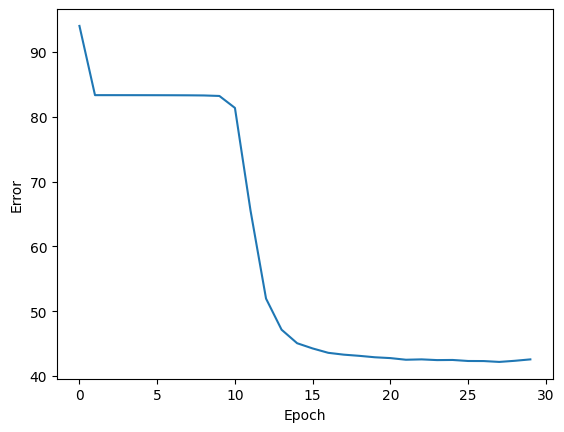

In [28]:
from math import exp
from random import seed
from random import random
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

# Calculate the derivative of a neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

# Backpropagate error and store it in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(neuron['output'] - expected[j])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] -= l_rate * neuron['delta']
def train_network(network, train, l_rate, n_epoch, n_outputs):
    errors = []  # List to store the errors for each epoch
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i] - outputs[i]) ** 2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        errors.append(sum_error)  # Store the error for the epoch
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    # Plot the errors
    plt.plot(range(n_epoch), errors)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.show()

# Usage example with Iris dataset
seed(0)
n_inputs = X_train.shape[1]
n_outputs = len(set(y_train))
network = initialize_network(n_inputs, 2, n_outputs)

# Combine input features and target labels for training
train_data = list(X_train)
train_data = [list(row) + [label] for row, label in zip(train_data, y_train)]

# Train the network
train_network(network, train_data, 0.5, 30, n_outputs)
